I) Résolution de l'équation différentielle avec le schéma Euler explicite
Question 1) 
Fonction f(y,l1,l2,m1,m2) 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(y,l1,l2,m1,m2):
    g=9.81
    k=-m2*l1*((y[3])**2)*sin(y[0]-y[1])*(cos(y[0]-y[1]))+g*m2*sin(y[1])*cos(y[0]-y[1])-m2*l2*(y[3]**2)*sin(y[0]-y[1])-(m1+m2)*g*sin(y[0])
    l=l1*(m1+m2)-m2*l1*(cos(y[0]-y[1])**2)
    m=l2*(m1+m2)-m2*l2*(cos(y[0]-y[1])**2)
    n=m2*l2*(y[3]**2)*sin(y[0]-y[1])*cos(y[0]-y[1])+g*(m1+m2)*sin(y[0])*cos(y[0]-y[1])+(m1+m2)*l1*(y[3]**2)*sin(y[0]-y[1])-g*(m1+m2)*sin(y[1])
    o=np.array([y[2],y[3],k/l,n/m])
    return o

Question 2)
Fonction stepEuler(yT,h,l1,l2,m1,m2)

In [3]:
def stepEuler(yt,h,l1,l2,m1,m2):
    return (yt+h*f(yt,l1,l2,m1,m2))

Question 3)
Fonction approximation

In [4]:
def approximation(y0,T,P,l1,l2,m1,m2):
    h=T/P
    L=[]
    L.append(y0)
    for i in range (1,P):
        L.append(stepEuler(y0,h,l1,l2,m1,m2))
        y0=L[i]
    return L

Question 4)
Test des fonctions avec les valeurs données en énoncé

In [5]:
m1=1
m2=1
l1=1
l2=1
y0=np.array([pi/2,pi/2,0,0])
P=1000
T=2
print(approximation(y0,T,P,l1,l2,m1,m2))

[array([ 1.57079633,  1.57079633,  0.        ,  0.        ]), array([ 1.57079633,  1.57079633, -0.01962   ,  0.        ]), array([ 1.57075709,  1.57079633, -0.03924   ,  0.        ]), array([  1.57067861e+00,   1.57079633e+00,  -5.88600000e-02,
        -6.04208735e-11]), array([  1.57056089e+00,   1.57079633e+00,  -7.84799995e-02,
        -6.04208715e-10]), array([  1.57040393e+00,   1.57079633e+00,  -9.80999979e-02,
        -2.77935997e-09]), array([  1.57020773e+00,   1.57079633e+00,  -1.17719993e-01,
        -8.82144598e-09]), array([  1.56997229e+00,   1.57079633e+00,  -1.37339983e-01,
        -2.24161357e-08]), array([  1.56969761e+00,   1.57079633e+00,  -1.56959963e-01,
        -4.90617146e-08]), array([  1.56938369e+00,   1.57079633e+00,  -1.76579928e-01,
        -9.64315954e-08]), array([  1.56903053e+00,   1.57079633e+00,  -1.96199869e-01,
        -1.74736815e-07]), array([  1.56863813e+00,   1.57079633e+00,  -2.15819777e-01,
        -2.97088512e-07]), array([  1.56820649e+00,

Question 5)
Visualisation des résultats

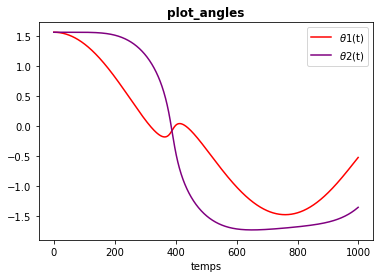

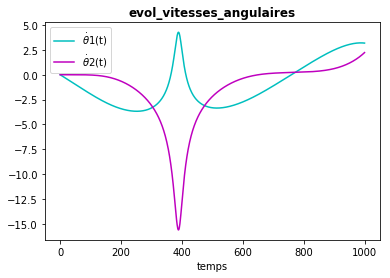

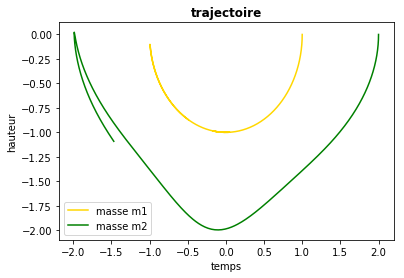

In [6]:
#a
m1=1
m2=1
l1=1
l2=1
y0=np.array([pi/2,pi/2,0,0])
P=1000
T=2

def plotangles(y0,T,P,l1,l2,m1,m2):
    L=approximation(y0,T,P,l1,l2,m1,m2)
    l=[]
    m=[]
    for i in range (0,P):
        l.append(L[i][0])
    for j in range (0,P):
        m.append(L[j][1]) 
    fig=figure()
    plot(l,'red',label=r'$\theta$1(t)')
    legend()
    plot(m,'purple',label=r'$\theta$2(t)')
    legend()
    plt.title("plot_angles",fontweight = 'bold')
    plt.xlabel("temps")
    
    

plotangles(y0,T,P,l1,l2,m1,m2)
#plt.savefig('evol_angle.pdf')  
plt.savefig('evol_angle')

def evol_vitesses_angulaires(y0,T,P,l1,l2,m1,m2):
    L=approximation(y0,T,P,l1,l2,m1,m2)
    l=[]
    m=[]
    for i in range (0,P):
        l.append(L[i][2])
    for j in range (0,P):
        m.append(L[j][3]) 
    fig=figure()
    plot(l,'c',label=r'$\.\theta$1(t)')
    legend()
    plot(m,'m',label=r'$\.\theta$2(t)')
    legend()
    plt.xlabel("temps")
    plt.title("evol_vitesses_angulaires",fontweight = 'bold')
evol_vitesses_angulaires(y0,T,P,l1,l2,m1,m2)
#plt.savefig('evol_vitesses_anguaires.pdf')
plt.savefig('evol_vitesses_angulaires')

#b
def plottrajectoire(y0,T,P,l1,l2,m1,m2):
    L=approximation(y0,T,P,l1,l2,m1,m2)
    l=[]
    m=[]
    n=[]
    o=[]
    for i in range (0,P):
        l.append(l1*sin(L[i][0]))
        m.append(-l1*cos(L[i][0]))
        n.append(l1*sin(L[i][0])+l2*(sin(L[i][1])))
        o.append(-l1*cos(L[i][0])-l2*(cos(L[i][1])))
    fig=figure()
    plot(l,m,'gold',label="masse m1")
    legend()
    plot(n,o,'green',label="masse m2")
    legend()
    plt.xlabel("temps")
    plt.ylabel("hauteur")
 
    plt.title("trajectoire",fontweight = 'bold')
    
plottrajectoire(y0,T,P,l1,l2,m1,m2)   
#plt.savefig('trajectoire.pdf')
plt.savefig('trajectoire')

Question 6)
Energie

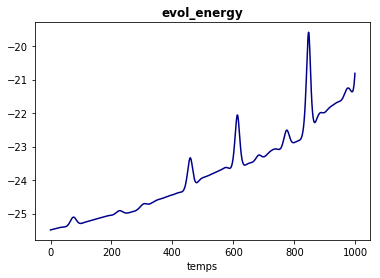

In [7]:
#a fonction énergie
def energie(y0,T,P,m1,m2,l1,l2):
    L=approximation(y0,T,P,l1,l2,m1,m2)
    l=[]
    m=[]
    k=[]
    g=9.81
    for i in range (0,P):
        l.append((1/2)*(m1+m2)*((L[i][2])**2)*(l1**2)+(1/2)*m2*((L[i][3])**2)*(l2**2)+m2*L[i][2]*L[i][3]*l1*l2*cos(L[i][0]-L[i][1]))
        m.append(-(m1+m2)*g*l1*cos(L[i][0])-m2*l2*g*cos(L[i][1]))
    for j in range (0,P):
        k.append(l[j]+m[j])
    return k

#b
def evol_energy(y0,T,P,m1,m2,l1,l2):
    l=energie(y0,T,P,m1,m2,l1,l2)
    fig=figure()
    plot(l,'darkblue')
    plt.xlabel("temps")
    plt.title("evol_energy",fontweight = 'bold')
    
#c représentation graphique de l'évolution de l'énergie avec les valeurs données en énoncé
m1=1
m2=1
l1=1
l2=1
y1=np.array([pi/6,pi/6,0,0])
P1=1000
T1=10
evol_energy(y1,T1,P1,m1,m2,l1,l2)
#plt.savefig('evol_energy.pdf')
plt.savefig('evol_energy1')

# L'énergie augmente au cours du temps donc l'énergie n'est pas conservée donc le schéma d'Euler explicite n'est pas la méthode de résolution la plus efficace. 




II) Résolution de l'équation différentielle avec les schéma de Verlet
Question 1)
Fonction stepVerlet(yt,h,l1,l2,m1,m2)

In [9]:
def stepVerlet(yt,h,l1,l2,m1,m2):
    k1=f(yt,l1,l2,m1,m2)
    y1=yt[0]+h*yt[2]+((h**2)/2)*k1[2]
    y2=yt[1]+h*yt[3]+((h**2)/2)*k1[3]
    w=array([y1,y2,yt[2],yt[3]])
    k2=f(w,l1,l2,m1,m2)
    y3=yt[2]+(h/2)*(k2[2]+k1[2])
    y4=yt[3]+(h/2)*(k2[3]+k1[3])
    y=array([y1,y2,y3,y4])
    return y

Question 2)
Calcul de le trajectoire avec stepVerlet
Les fonctions précédentes ont été modifiées pour fonctionner avec le nouveau schéma.

[array([ 1.57079633,  1.57079633,  0.        ,  0.        ]), array([  1.57077671e+00,   1.57079633e+00,  -1.96200000e-02,
        -7.55260743e-12]), array([  1.57071785e+00,   1.57079633e+00,  -3.92399999e-02,
        -1.35946961e-10]), array([  1.57061975e+00,   1.57079633e+00,  -5.88599993e-02,
        -8.68550018e-10]), array([  1.57048241e+00,   1.57079633e+00,  -7.84799974e-02,
        -3.41377896e-09]), array([  1.57030583e+00,   1.57079633e+00,  -9.80999924e-02,
        -1.00676254e-08]), array([  1.57009001e+00,   1.57079633e+00,  -1.17719982e-01,
        -2.45761777e-08]), array([  1.56983495e+00,   1.57079633e+00,  -1.37339961e-01,
        -5.24981380e-08]), array([  1.56954065e+00,   1.57079633e+00,  -1.56959924e-01,
        -1.01567331e-07]), array([  1.56920711e+00,   1.57079633e+00,  -1.76579863e-01,
        -1.82055199e-07]), array([  1.56883433e+00,   1.57079633e+00,  -1.96199770e-01,
        -3.07133269e-07]), array([  1.56842231e+00,   1.57079633e+00,  -2.15819630e-0

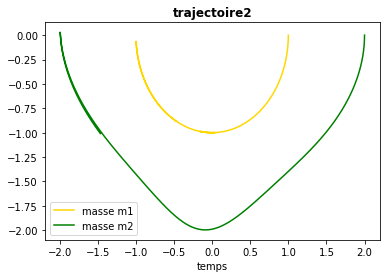

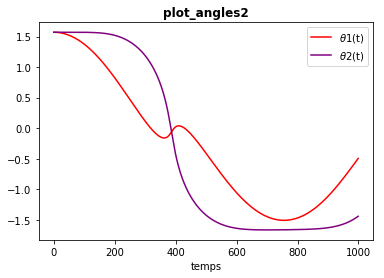

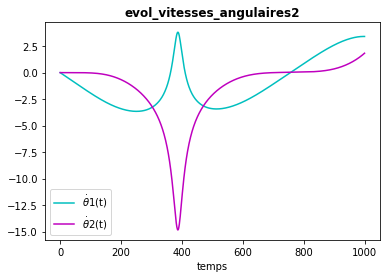

In [10]:
m1=1
m2=1
l1=1
l2=1
y0=np.array([pi/2,pi/2,0,0])
P=1000
T=2
def approximation2(y0,T,P,l1,l2,m1,m2):
    h=T/P
    L=[]
    L.append(y0)
    for i in range (1,P):
        L.append(stepVerlet(y0,h,l1,l2,m1,m2))
        y0=L[i]
    return L

m1=1
m2=1
l1=1
l2=1
y0=np.array([pi/2,pi/2,0,0])
P=1000
T=2
print(approximation2(y0,T,P,l1,l2,m1,m2))

def plottrajectoire2(y0,T,P,l1,l2,m1,m2):
    L=approximation2(y0,T,P,l1,l2,m1,m2)
    l=[]
    m=[]
    n=[]
    o=[]
    for i in range (0,P):
        l.append(l1*sin(L[i][0]))
        m.append(-l1*cos(L[i][0]))
        n.append(l1*sin(L[i][0])+l2*(sin(L[i][1])))
        o.append(-l1*cos(L[i][0])-l2*(cos(L[i][1])))
    fig=figure()
    plot(l,m,'gold',label="masse m1")
    legend()
    plot(n,o,'green',label="masse m2")
    legend()
    plt.xlabel("temps")
    
    plt.title("trajectoire2",fontweight = 'bold')
    
plottrajectoire2(y0,T,P,l1,l2,m1,m2)   
#plt.savefig('trajectoire2.pdf')
plt.savefig('trajectoire2')
    
def plotangles2(y0,T,P,l1,l2,m1,m2):
    L=approximation2(y0,T,P,l1,l2,m1,m2)
    l=[]
    m=[]
    for i in range (0,P):
        l.append(L[i][0])
    for j in range (0,P):
        m.append(L[j][1]) 
    fig=figure()
    plot(l,'red',label=r'$\theta$1(t)')
    legend()
    plot(m,'purple',label=r'$\theta$2(t)')
    legend()
    plt.xlabel("temps")
    
    plt.title("plot_angles2",fontweight = 'bold')
    
plotangles2(y0,T,P,l1,l2,m1,m2)
#plt.savefig('evol_angle2.pdf')  
plt.savefig('evol_angle2')

def evol_vitesses_angulaires2(y0,T,P,l1,l2,m1,m2):
    L=approximation2(y0,T,P,l1,l2,m1,m2)
    l=[]
    m=[]
    for i in range (0,P):
        l.append(L[i][2])
    for j in range (0,P):
        m.append(L[j][3]) 
    fig=figure()
    plot(l,'c',label=r'$\.\theta$1(t)')
    legend()
    plot(m,'m',label=r'$\.\theta$2(t)')
    legend()
    plt.xlabel("temps")
    plt.title("evol_vitesses_angulaires2",fontweight = 'bold')
evol_vitesses_angulaires2(y0,T,P,l1,l2,m1,m2)
#plt.savefig('evol_vitesses_anguaires2.pdf')
plt.savefig('evol_vitesses_angulaires2')
    
#les méthodes de visualisation fonctionnent avec le schéma de Verlet, seul
#l'appel aux nouvelles fonctions utilisant Verlet a été changé

Question 3)
Représentation graphique de l'énergie au cours du temps pour les conditions initales données en question 6c

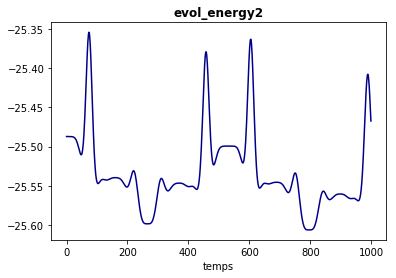

In [11]:
m1=1
m2=1
l1=1
l2=1
y0=np.array([pi/6,pi/6,0,0])
P=1000
T=10
h=T/P

def energie2(y0,T,P,m1,m2,l1,l2):
    L=approximation2(y0,T,P,l1,l2,m1,m2)
    l=[]
    m=[]
    k=[]
    g=9.81
    for i in range (0,P):
        l.append((1/2)*(m1+m2)*((L[i][2])**2)*(l1**2)+(1/2)*m2*((L[i][3])**2)*(l2**2)+m2*L[i][2]*L[i][3]*l1*l2*cos(L[i][0]-L[i][1]))
        m.append(-(m1+m2)*g*l1*cos(L[i][0])-m2*l2*g*cos(L[i][1]))
    for j in range (0,P):
        k.append(l[j]+m[j])
    fig=figure()
    plot(k,'darkblue')
    plt.title("evol_energy2",fontweight = 'bold')
    plt.xlabel("temps")
energie2(y1,T1,P1,m1,m2,l1,l2)
#plt.savefig('evol_energy2.pdf')
plt.savefig('evol_energy2')

#L'énergie est mieux conservée que pour le schéma d'Euler explicite car le signal est périodique au cours du temps. 
    

III) Mouvement chaotique et sensibilité par rapport aux conditions initiales
Question 1)
Fonction plot_espace_phases(y0,T,P,m1,m2,l1,l2

In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


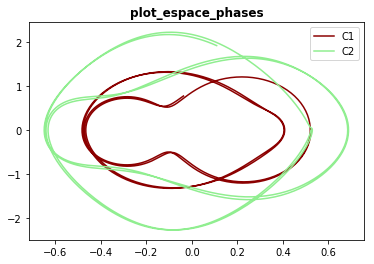

In [12]:
def plot_espace_phases(y0,T,P,m1,m2,l1,l2):
    l=approximation2(y0,T,P,m1,m2,l1,l2)
    L1=[]
    L2=[]
    L3=[]
    L4=[]
    for i in range (0,P):
        L1.append(l[i][0])
        L2.append(l[i][2])
        L3.append(l[i][1])
        L4.append(l[i][3])
   
    fig=figure()
    plot(L1,L2,"darkred",label="C1")
    legend()
    plot(L3,L4,"lightgreen",label="C2")
    legend()
    
    
    
    plt.title("plot_espace_phases",fontweight = 'bold')

m1=1
m2=1
l1=1
l2=1
y0=np.array([pi/6,pi/6,0,0])
P=1000
T=10
h=T/P    
plot_espace_phases(y0,T,P,m1,m2,l1,l2)

Question 2)
Régime de petites oscillations avec conditions initiales données

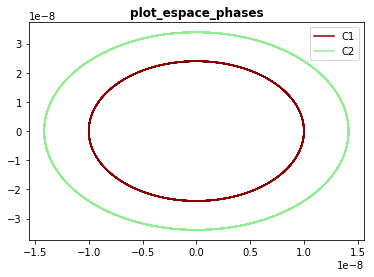

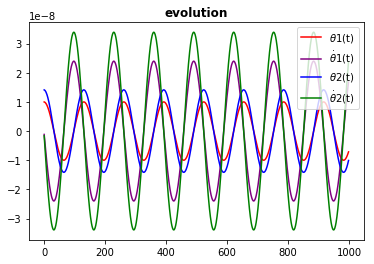

In [13]:
#a Calcul de la trajectoire pour des conditions initiales données
y0=array([10**(-8),sqrt(2)*10**(-8),0,0])
P=1000
T=20
m1=1
m2=1
l1=1
l2=1

    
def graph1(y0,T,P,m1,m2,l1,l2):
    l=approximation2(y0,T,P,m1,m2,l1,l2)
    h=[]
    k=[]
    m=[]
    n=[]
    for i in range (1,P):
        h.append(l[i][0])
        k.append(l[i][2])
        m.append(l[i][1])
        n.append(l[i][3])
    fig=figure()
    plot(h,'red',label=r'$\theta$1(t)')
    legend()
    plot(k,"purple",label=r'$\.\theta$1(t)')
    legend()
    plot(m,"blue",label=r'$\theta$2(t)')
    legend()
    plot(n,"green",label=r'$\.\theta$2(t)')
    legend()
    plt.xlabel=('temps')
    plt.title("evolution",fontweight = 'bold')
plot_espace_phases(y0,T,P,m1,m2,l1,l2)
graph1(y0,T,P,m1,m2,l1,l2)

#Les Ci forment des elipses. 
plt.savefig('grapheracine')


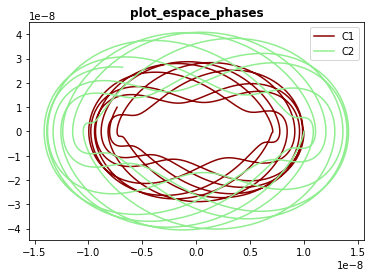

In [14]:
#b nouvelles conditions
y1=array([10**(-8),10**(-8),0,0])
P=1000
T=20
m1=1
m2=1
l1=1
l2=1

plot_espace_phases(y1,T,P,m1,m2,l1,l2)
#Question 2.b)
#Dans le premier cas, on observe que pour y=[10-8,21/2 *10-8,0,0], les ϴ i et les ϴ.i sont des signaux sinusoïdaux. De plus, les Ci forment une ellipse. Dans le cas 2, les ϴ i et les ϴ.i n’ont plus une forme de sinusoïdale mais on néanmoins des signaux périodique. La forme globale des Ci tend vers une ellipse. La seule différence est qu’à la deuxième coordonnée, on a remplacé dans y ,21/2 *10-8 par 10-8 . On peut en déduire que le système est sensible aux conditions initiales.Une faible variation des données entrainent des différences majeures.  


Question 3)
Transition vers un mouvement chaotique

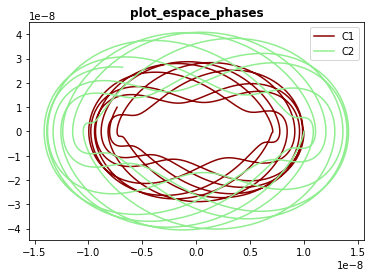

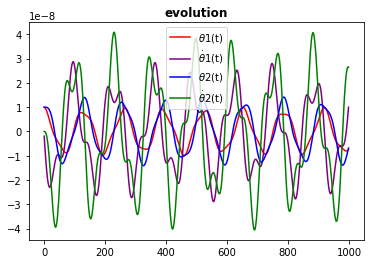

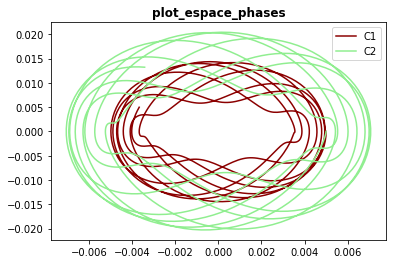

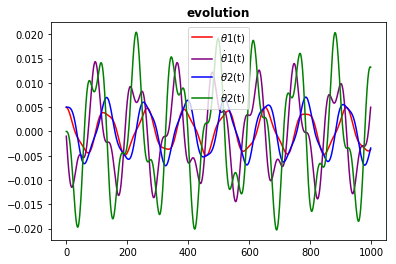

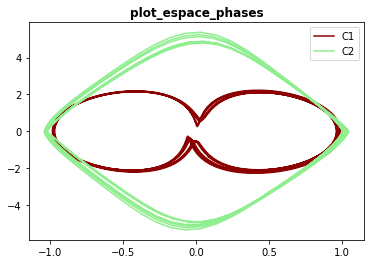

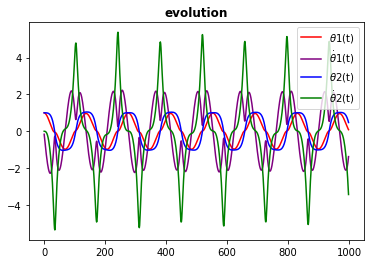

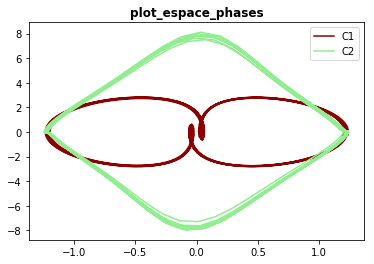

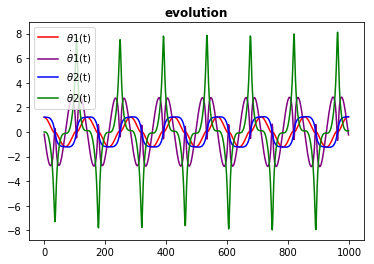

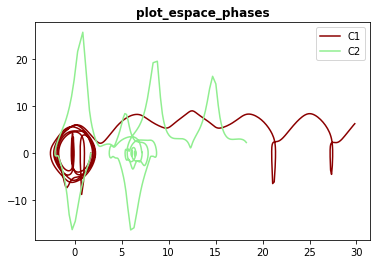

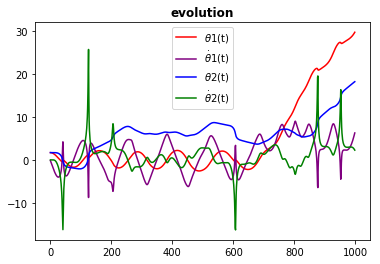

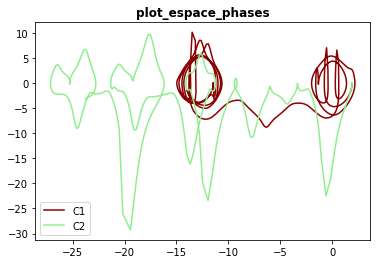

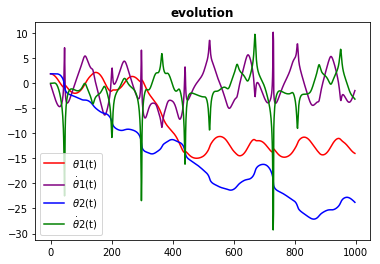

In [15]:
#def mouvementchaotique(T,P,m1,m2,l1,l2):
    #p=array([10**(-8),5*10**(-3),1,1.2,1.7,1.9])
    #for i in (0,4):
        #y0=array([p[i],p[i],0,0])
        #plot_espace_phases(y0,T,P,m1,m2,l1,l2)
        #graph1(y0,T,P,m1,m2,l1,l2)

y0=array([10**(-8),10**(-8),0,0])
y1=array([5*10**(-3),5*10**(-3),0,0])
y2=array([1,1,0,0])
y3=array([1.2,1.2,0,0])
y4=array([1.7,1.7,0,0])
y5=array([1.9,1.9,0,0])


plot_espace_phases(y0,T,P,m1,m2,l1,l2)
#plt.savefig('espace_phases_y0.pdf')
plt.savefig('espace_phases_y0')
graph1(y0,T,P,m1,m2,l1,l2)
#plt.savefig('graphe_y0.pdf')
plt.savefig('graphe_y0')


plot_espace_phases(y1,T,P,m1,m2,l1,l2) 
#plt.savefig('espace_phases_y1.pdf')
plt.savefig('espace_phases_y1')
graph1(y1,T,P,m1,m2,l1,l2)
#plt.savefig('graphe_y1.pdf')
plt.savefig('graphe_y1')

plot_espace_phases(y2,T,P,m1,m2,l1,l2)
#plt.savefig('espace_phases_y2.pdf')
plt.savefig('espace_phases_y2')
graph1(y2,T,P,m1,m2,l1,l2)
#plt.savefig('graphe_y2.pdf')
plt.savefig('graphe_y2')

plot_espace_phases(y3,T,P,m1,m2,l1,l2)
#plt.savefig('espace_phases_y3.pdf')
plt.savefig('espace_phases_y3')
graph1(y3,T,P,m1,m2,l1,l2)
#plt.savefig('graphe_y3.pdf')
plt.savefig('graphe_y3')

plot_espace_phases(y4,T,P,m1,m2,l1,l2) 
#plt.savefig('espace_phases_y4.pdf')
plt.savefig('espace_phases_y4')
graph1(y4,T,P,m1,m2,l1,l2)
#plt.savefig('graphe_y4.pdf')
plt.savefig('graphe_y4')

plot_espace_phases(y5,T,P,m1,m2,l1,l2)
#plt.savefig('espace_phases_y5.pdf')
plt.savefig('espace_phases_y5')
graph1(y5,T,P,m1,m2,l1,l2)
#plt.savefig('graphe_y5.pdf')
plt.savefig('graphe_y5')
# Q3 a)
#Evolution
#On observe également que globalement, plus α augmentent, plus les ϴ i et les ϴ.i dégénèrent. Leurs signaux sont de moins en moins périodiques jusqu’à ne plus l’être du tout dans les deux derniers cas (y4 et y5). 

#Plot_espace_phases
#L’observation des Ci appuient celle d’évolution. Moins les ϴ i et les ϴ.i sont périodiques et s’éloignent de la forme de la sinusoïdale (cas  y=[10-8,21/2 *10-8,0,0], plus les Ci perdront leurs structure d’ellipse et tendront vers des mouvements chaotiques (comme on peut le voir dans deux derniers cas y4 et y5). Donc plus α s’éloignent de la position d’équilibre stable (α =0) plus, le mouvement deviendra chaotique. 
